Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement time (from versions: none)
ERROR: No matching distribution found for time

[notice] A new release of pip is available: 23.1.2 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Could not find a version that satisfies the requirement sys (from versions: none)
ERROR: No matching distribution found for sys

[notice] A new release of pip is available: 23.1.2 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.
Matriz de coordenadas creada:  [[ 565.  575.]
 [  25.  185.]
 [ 345.  750.]
 [ 945.  685.]
 [ 845.  655.]
 [ 880.  660.]
 [  25.  230.]
 [ 525. 1000.]
 [ 580. 1175.]
 [ 650. 1130.]
 [1605.  620.]
 [1220.  580.]
 [1465.  200.]
 [1530.    5.]
 [ 845.  680.]
 [ 725.  370.]
 [ 145.  665.]
 [ 415.  635.]
 [ 510.  875.]
 [ 560.  365.]
 [ 300.  465.]
 [ 520.  585.]
 [ 480.  415.]
 [ 835.  625.]
 [ 975.  580.]
 [1215.  245.]
 [1320.  315.]
 [1250.  400.]
 [ 660.  180.]
 [ 410.  250.]
 [ 420.  555.]
 [ 575.  665.]
 [1150. 1160.]
 [ 700.  580.]
 [ 685.  595.]
 [ 685.  610.]
 [ 770.  610.]
 [ 795.  645.]
 [ 720.  635.]
 [ 760.  650.]
 [ 475.  960.]
 [  95.  260.]
 [ 875.  920.]
 [ 700.  500.]
 [ 555.  815.]
 [ 830.  485.]
 [1170.   65.]
 [ 830.  610.]
 [ 605.  625.]
 [ 595.  360.]
 [1340.  725.]
 [1740.  245.]]
[[   2.          666.10809934  281.11385594 ...  217.08293346
   789.38267019 1220.46097848]
 [ 666.10809934    2.        

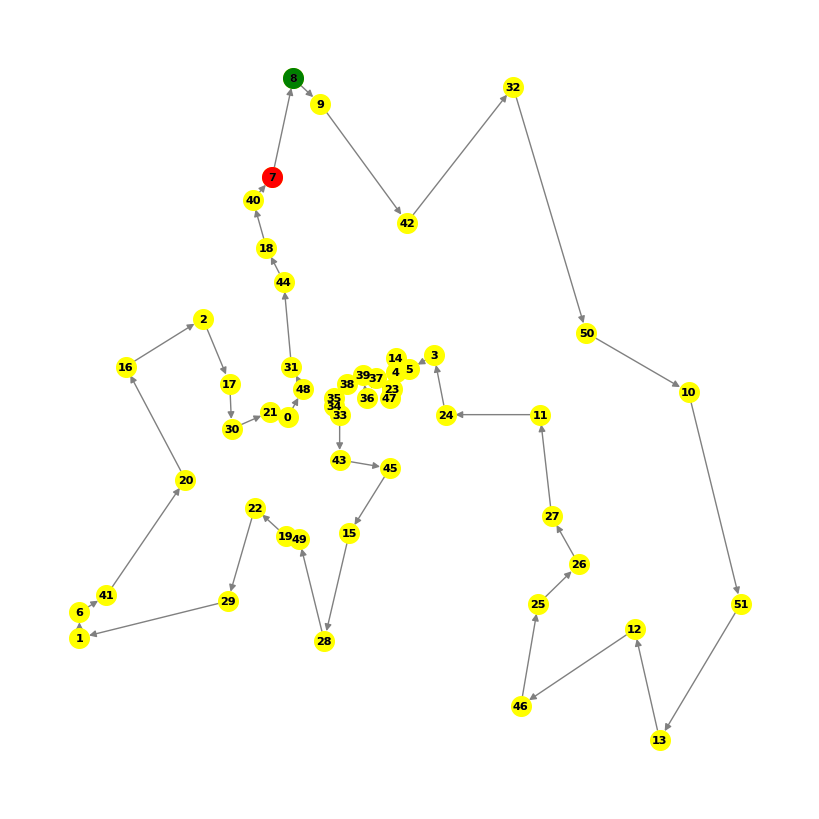

In [1]:
%pip install networkx
%pip install pandas
%pip install matplotlib
%pip install numpy
%pip install time
%pip install sys

import numpy as np
import time
import sys
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from funciones import *


semilla = 3
tamaño_colonia = 50
numero_iteraciones = 100 
evaporacion_feromona = 0.1
beta = 2.5
q0 = 0.9
archivo_entrada = "berlin52.txt" 
   

np.random.seed(semilla)
start = time.time()

# Leemos el archivo de entrada con pandas
archivo = pd.read_csv(archivo_entrada, skiprows=6, delim_whitespace=True, names=['Nodo', 'X', 'Y'], skipfooter=1, engine='python')
# Filtra solo las coordenadas que van del nodo 1 al nodo 52
coordenadas = archivo[archivo['Nodo'].between(1, 52)][['X', 'Y']]
# Convierte las coordenadas a una matriz de numpy
matriz_coordenadas = coordenadas.to_numpy()
print("Matriz de coordenadas creada: ", matriz_coordenadas)
# Numero de nodos correspondiente a la longitud de la matriz de coordenadas
nro_nodos = len(matriz_coordenadas)
# Creamos la matriz de distancias
matriz_distancias = crear_matriz_distancias(nro_nodos,matriz_coordenadas)
print(matriz_distancias)
# Creamos una solucion inicial randomica
arreglo_mejor_solucion = crear_solucion_inicial(nro_nodos)
print("Solucion inicial random creada: ", arreglo_mejor_solucion)
# Calculamos la distancia de la solucion inicial
valor_mejor_solucion = calcular_distancia_hormiga(arreglo_mejor_solucion,matriz_distancias)
print("Distancia de la solucion inicial: ", valor_mejor_solucion)
# Creamos la matriz de feromonas
feromona, valor_inicial_feromona = crear_matriz_de_feromonas(nro_nodos,tamaño_colonia, valor_mejor_solucion)
# Creamos la matriz de heuristica
matriz_heuristica = crear_matriz_heuristica(matriz_distancias)
# Ciclo de iteracion con condicion de parada la solucion optima o el numero de iteraciones
while numero_iteraciones > 0 and np.round(valor_mejor_solucion, decimals=4) != 7544.3659:
    colonia, memoria_hormiga = crear_colonia_de_hormigas(tamaño_colonia,nro_nodos)
    for i in range(tamaño_colonia):    
        avanzar_hormiga(i,memoria_hormiga,feromona,colonia,nro_nodos,matriz_heuristica,evaporacion_feromona,valor_inicial_feromona,beta,q0)
    for i in range(tamaño_colonia):   
        if calcular_distancia_hormiga(colonia[i],matriz_distancias) < valor_mejor_solucion:
            valor_mejor_solucion = calcular_distancia_hormiga(colonia[i],matriz_distancias)
            arreglo_mejor_solucion = colonia[i]
    actualizar_feromona_global(feromona,nro_nodos,evaporacion_feromona,arreglo_mejor_solucion,valor_mejor_solucion)
    feromona *= (1-evaporacion_feromona)    
    numero_iteraciones -= 1

end = time.time()   
print("Mejor distancia: ", valor_mejor_solucion)
print("Mejor solucion: ", arreglo_mejor_solucion)
print("Tiempo de ejecución: ", end - start)

# Crear un grafo dirigido
G = nx.DiGraph()

# Agregar nodos al grafo
for i in range(len(matriz_coordenadas)):
    G.add_node(i)

# Agregar aristas al grafo
for i in range(len(arreglo_mejor_solucion) - 1):
    G.add_edge(arreglo_mejor_solucion[i], arreglo_mejor_solucion[i + 1])
G.add_edge(arreglo_mejor_solucion[-1], arreglo_mejor_solucion[0])

# Crear el diseño (layout) para posicionar los nodos
pos = {i: (matriz_coordenadas[i, 0], matriz_coordenadas[i, 1]) for i in G.nodes()}

# Dibuja el grafo
plt.figure(figsize=(8, 8))
nx.draw(G, pos, with_labels=True, node_size=200, node_color="yellow", font_color="black", font_size=8, font_weight="bold", edge_color="gray")
nx.draw_networkx_labels(G, pos, labels={i: i for i in G.nodes()}, font_size=8, font_weight="bold")

# Personaliza el nodo de inicio (verde) y el nodo final (rojo)
start_node = arreglo_mejor_solucion[0]
end_node = arreglo_mejor_solucion[-1]
nx.draw_networkx_nodes(G, pos, nodelist=[start_node], node_color="green", node_size=200)
nx.draw_networkx_nodes(G, pos, nodelist=[end_node], node_color="red", node_size=200)

# Muestra el grafo
plt.axis('off')
plt.show()

            